In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
import shap

from treemind.algorithm import Explainer

from examples.examples_plot import (
    plot_line_chart,
    plot_scatter_chart,
    interaction_scatter_plot,
    feature_plot,
)

In [2]:
n_samples = 12000
np.random.seed(42)  # Setting a random seed for reproducibility

# Generating features with values shifted to be greater than 3
feature_0 = 3 + np.random.chisquare(df=3, size=n_samples)
feature_1 = 3 + np.abs(np.random.normal(loc=2, scale=1.5, size=n_samples))
feature_2 = 3 + np.random.uniform(low=0, high=5, size=n_samples)

# Adjusted transformations ensuring positive values
transformed_0 = np.log(feature_0)
transformed_1 = np.sqrt(feature_1)
transformed_2 = np.exp(0.1 * feature_2)

# Complex interaction term
interaction_term = transformed_0 * transformed_1 * transformed_2 * np.sin(feature_0 + feature_1 + feature_2)

# Ensuring positive target variable
target = 3 + np.abs(interaction_term) + np.abs(np.random.normal(loc=0, scale=0.2, size=n_samples))

# Adding controlled positive outliers
outlier_idx = np.random.choice(n_samples, size=int(n_samples * 0.005), replace=False)  # 0.5% outliers
target[outlier_idx] += np.abs(np.random.normal(loc=3, scale=3, size=len(outlier_idx)))  # Adding positive outliers

# Creating DataFrame
df = pd.DataFrame({
    'feature_0': feature_0,
    'feature_1': feature_1,
    'feature_2': feature_2,
    'target': target
})

# Splitting the data
X = df.drop('target', axis=1).values
y = df['target'].values


In [4]:
# Train a LightGBM model
reg = LGBMRegressor(verbose=-1, n_estimators=200, num_leaves=50, learning_rate=0.02)
reg.fit(X, y)  #
pred = reg.predict(X)

In [5]:
# Use treemind's Explainer to analyze the trained model
explainer = Explainer()
explainer(reg)

# # Use shap's TreeExplainer to analyze the trained model
shap_explainer = shap.TreeExplainer(reg)
shap_values = shap_explainer(X)
shap_interaction_values = shap_explainer.shap_interaction_values(X)

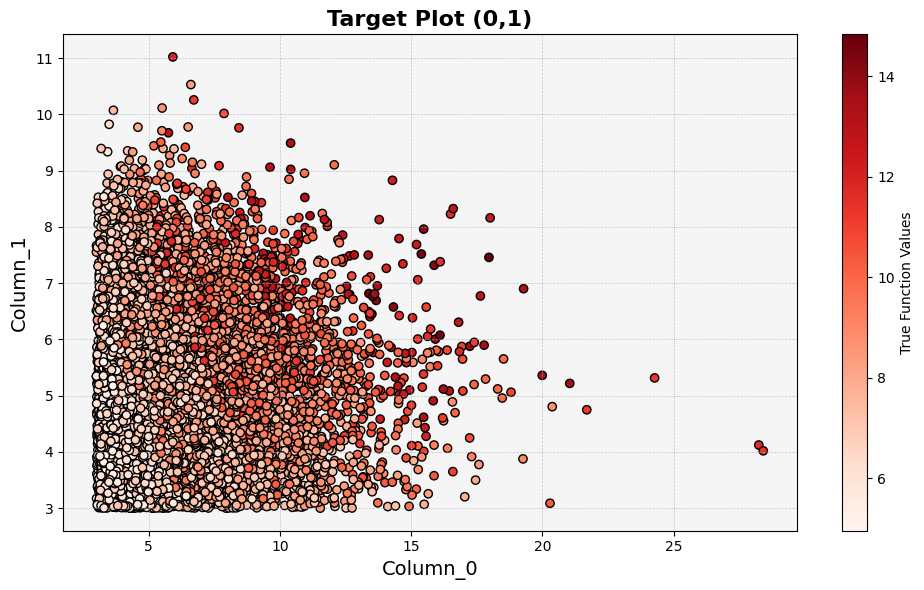

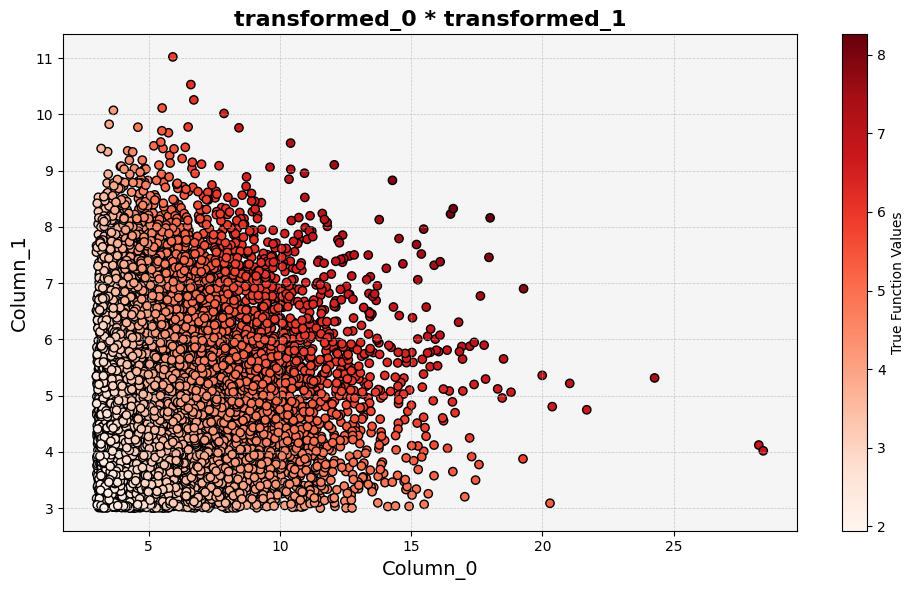

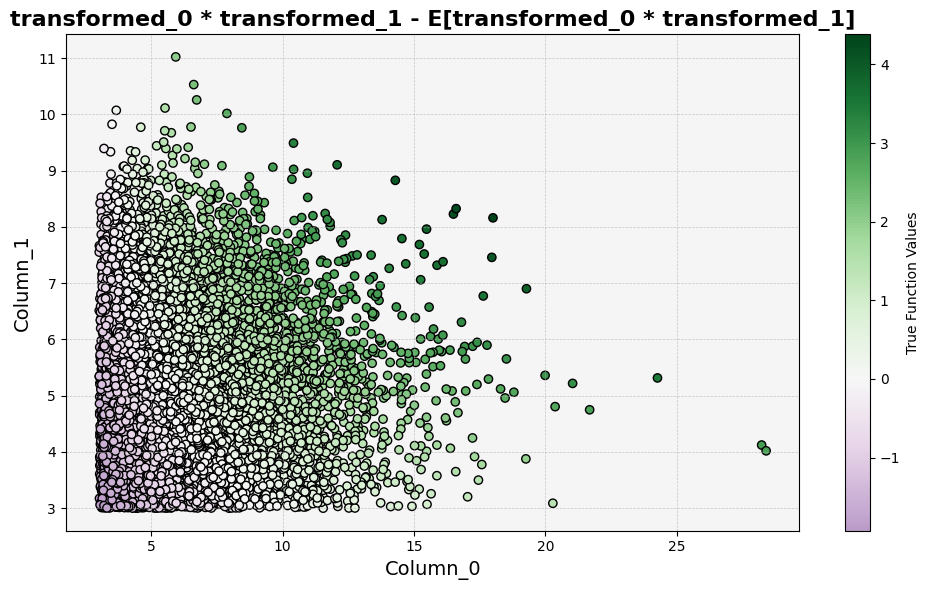

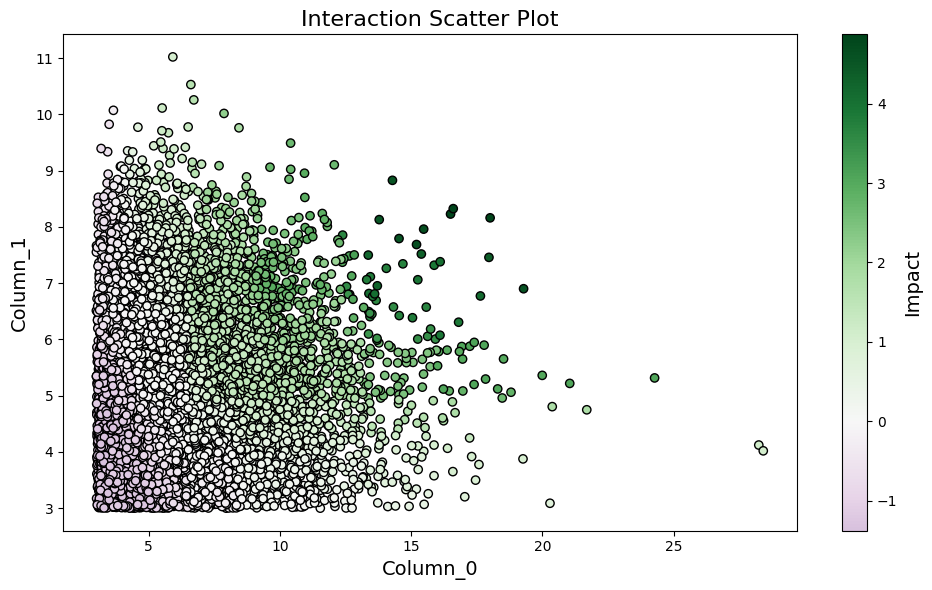

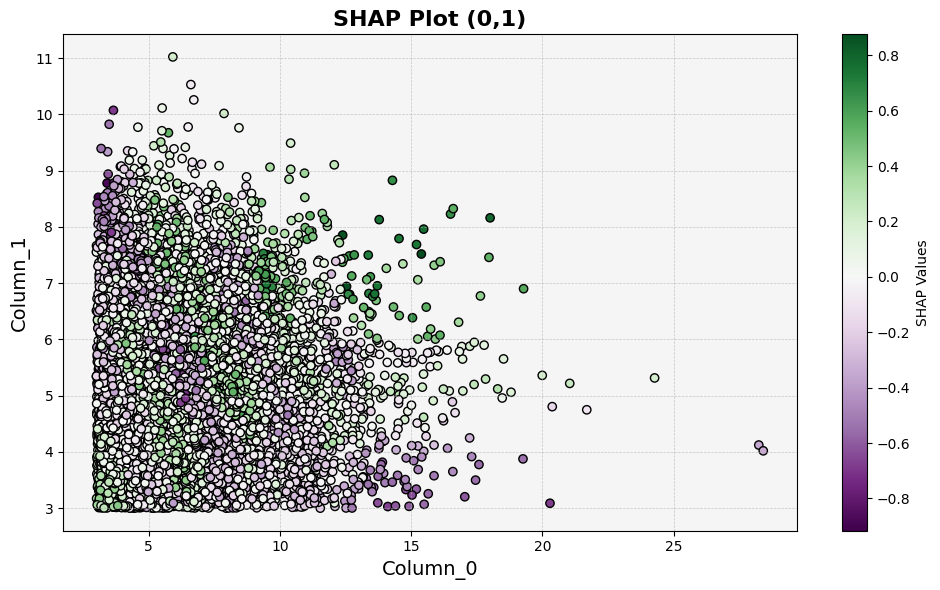

In [6]:
# Interaction Analysis: Feature 0 & Feature 1
df_01 = explainer.analyze_interaction(0, 1)

plot_scatter_chart(
    feature_0,
    feature_1,
    pred,
    x_label="Column_0",
    y_label="Column_1",
    title="Target Plot (0,1)",
    cbar_label="True Function Values",
)

plot_scatter_chart(
    feature_0,
    feature_1,
    transformed_0 * transformed_1,
    x_label="Column_0",
    y_label="Column_1",
    title="transformed_0 * transformed_1",
    cbar_label="True Function Values",
)

plot_scatter_chart(
    feature_0,
    feature_1,
    transformed_0 * transformed_1 - np.mean(transformed_0 * transformed_1),
    x_label="Column_0",
    y_label="Column_1",
    title="transformed_0 * transformed_1 - E[transformed_0 * transformed_1]",
    cbar_label="True Function Values",
)

interaction_scatter_plot(X, df_01, 0, 1, figsize = (10,6))

plot_scatter_chart(
    feature_0,
    feature_1,
    shap_interaction_values[:, 0, 1],
    x_label="Column_0",
    y_label="Column_1",
    title="SHAP Plot (0,1)",
    cbar_label="SHAP Values",
)

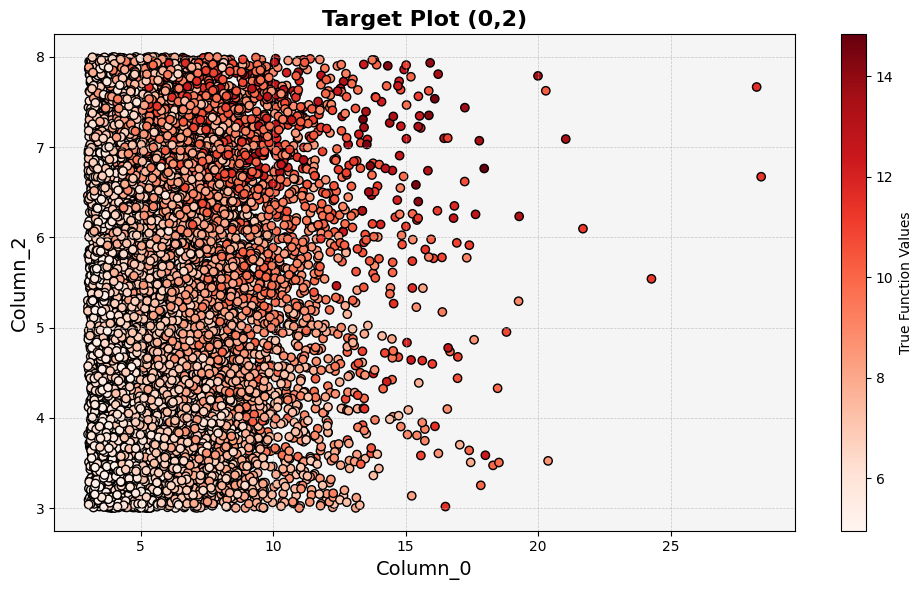

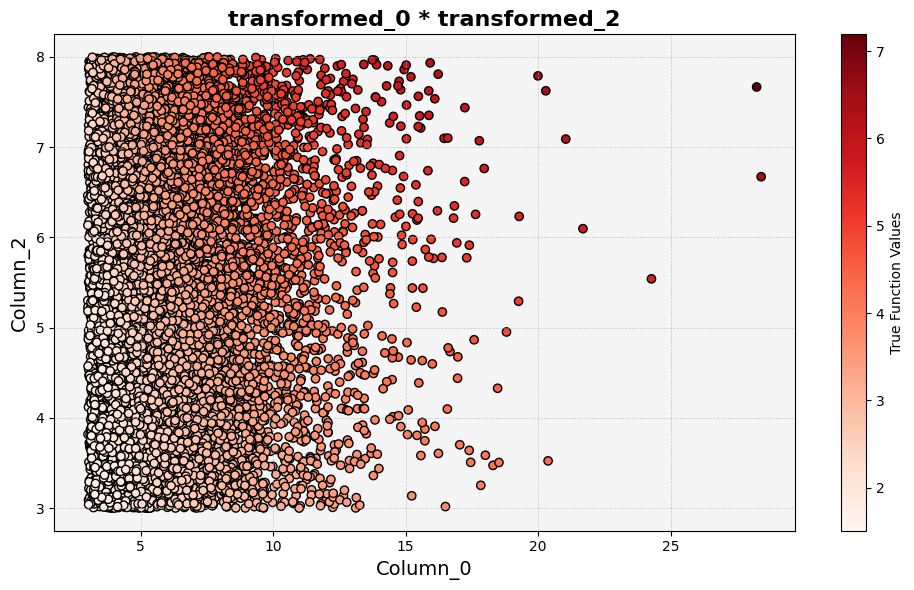

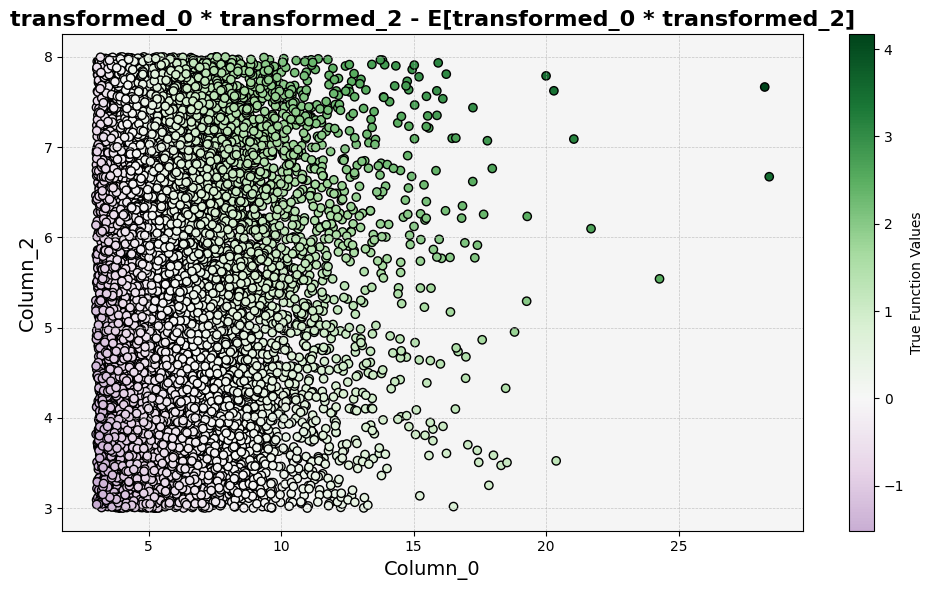

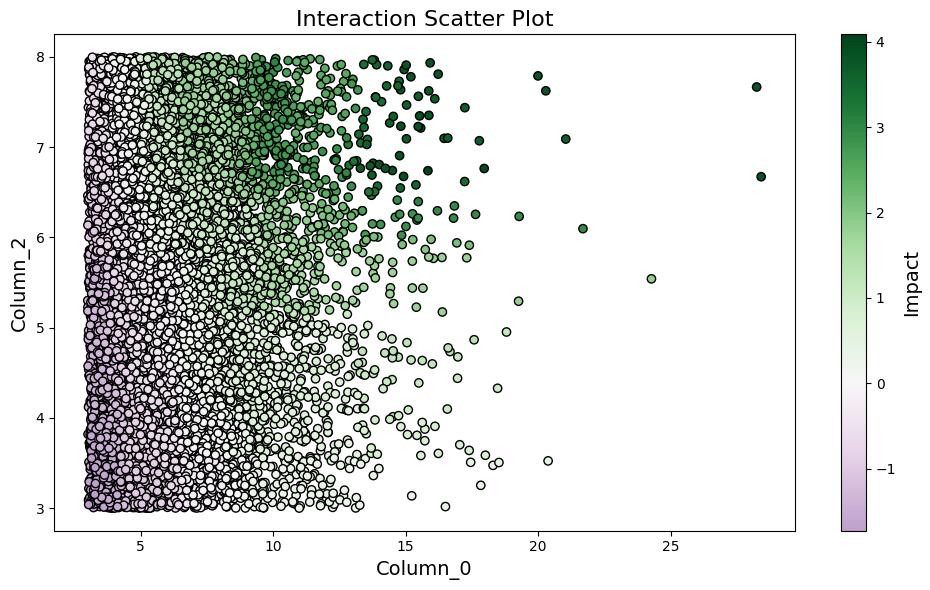

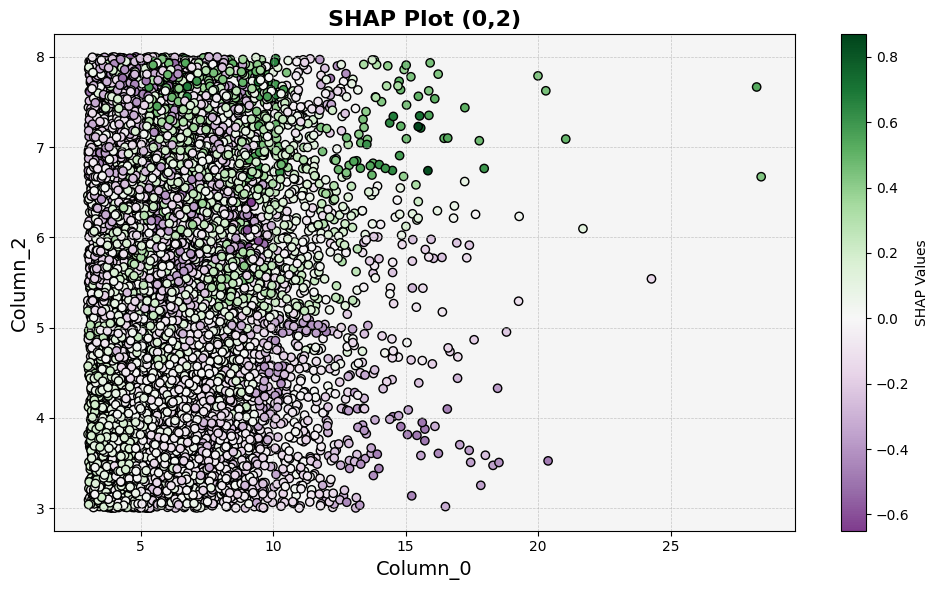

In [7]:
# Interaction Analysis: Feature 2 & Feature 3
df_02 = explainer.analyze_interaction(0, 2)
plot_scatter_chart(
    feature_0,
    feature_2,
    pred,
    x_label="Column_0",
    y_label="Column_2",
    title="Target Plot (0,2)",
    cbar_label="True Function Values",
)

plot_scatter_chart(
    feature_0,
    feature_2,
    transformed_0 * transformed_2,
    x_label="Column_0",
    y_label="Column_2",
    title="transformed_0 * transformed_2",
    cbar_label="True Function Values",
)

plot_scatter_chart(
    feature_0,
    feature_2,
    transformed_0 * transformed_2 - np.mean(transformed_0 * transformed_2 ),
    x_label="Column_0",
    y_label="Column_2",
    title="transformed_0 * transformed_2 - E[transformed_0 * transformed_2]",
    cbar_label="True Function Values",
)

interaction_scatter_plot(X, df_02, 0, 2,  figsize = (10,6))

plot_scatter_chart(
    feature_0,
    feature_2,
    shap_interaction_values[:, 0, 2],
    x_label="Column_0",
    y_label="Column_2",
    title="SHAP Plot (0,2)",
    cbar_label="SHAP Values",
)

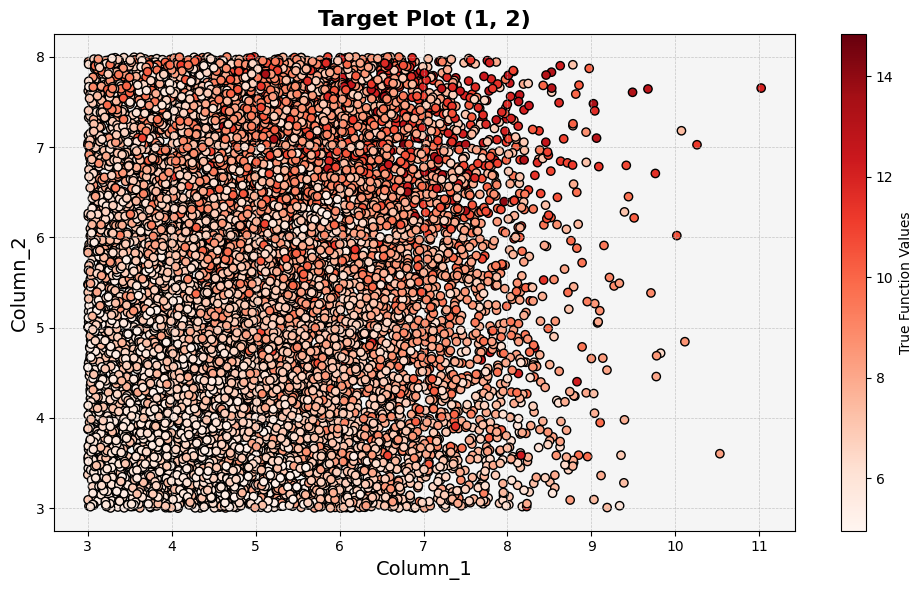

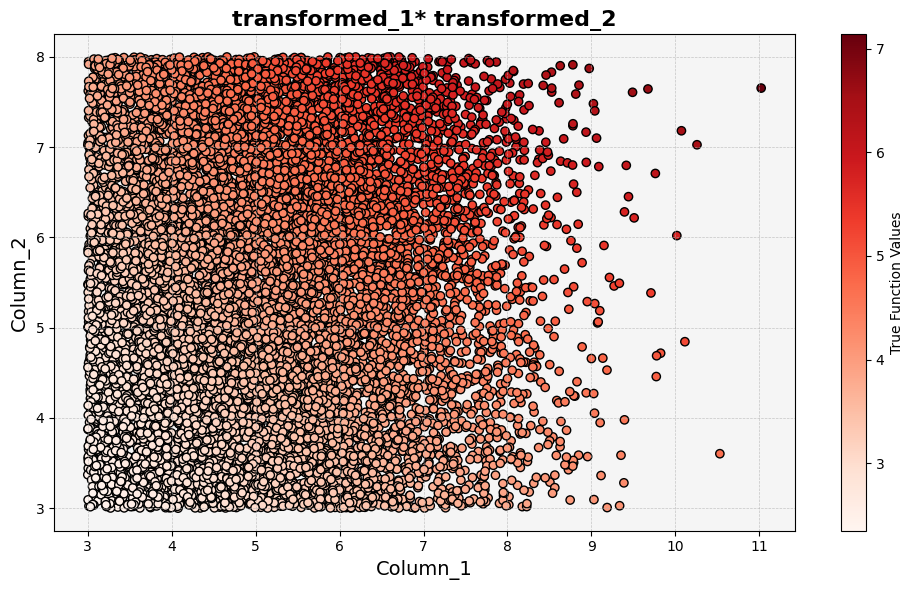

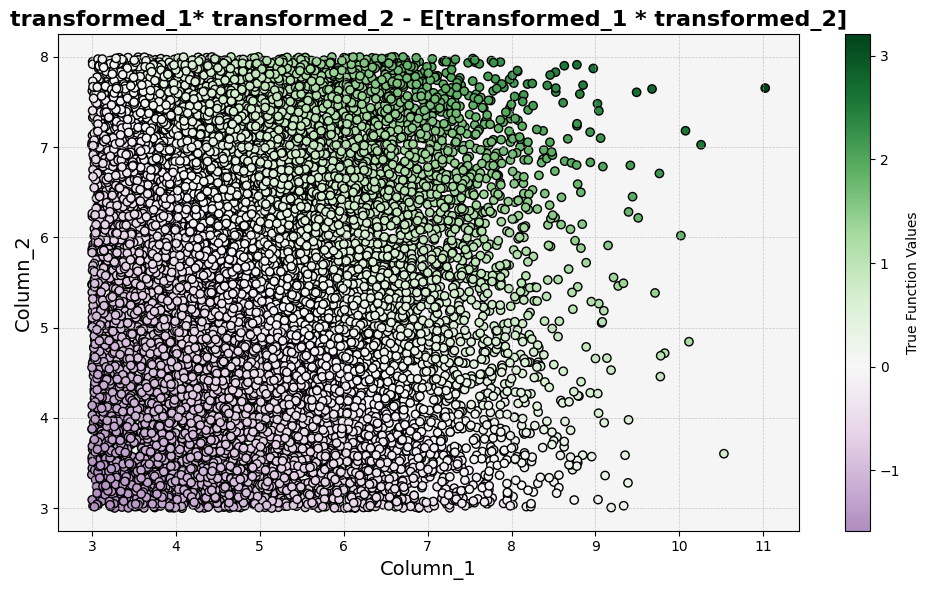

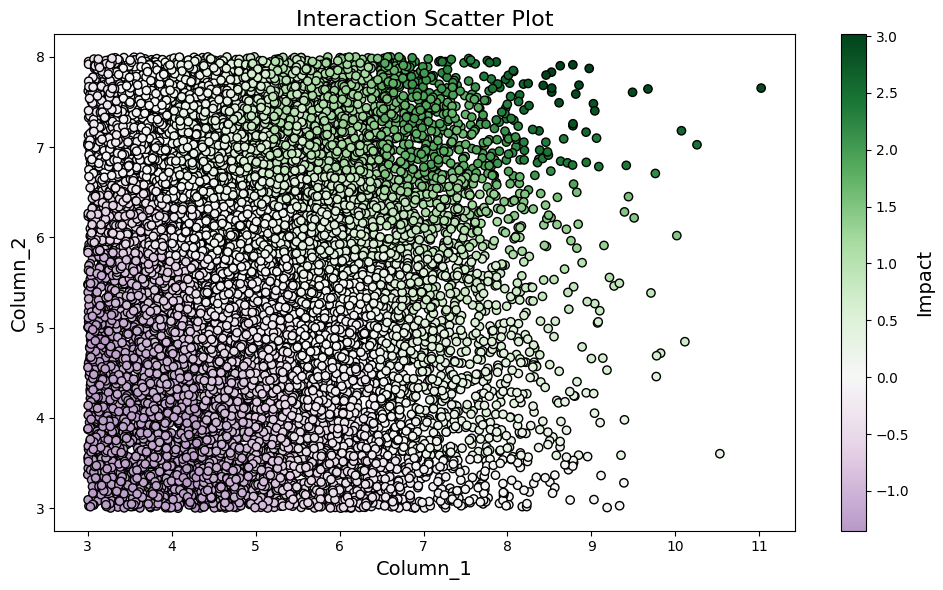

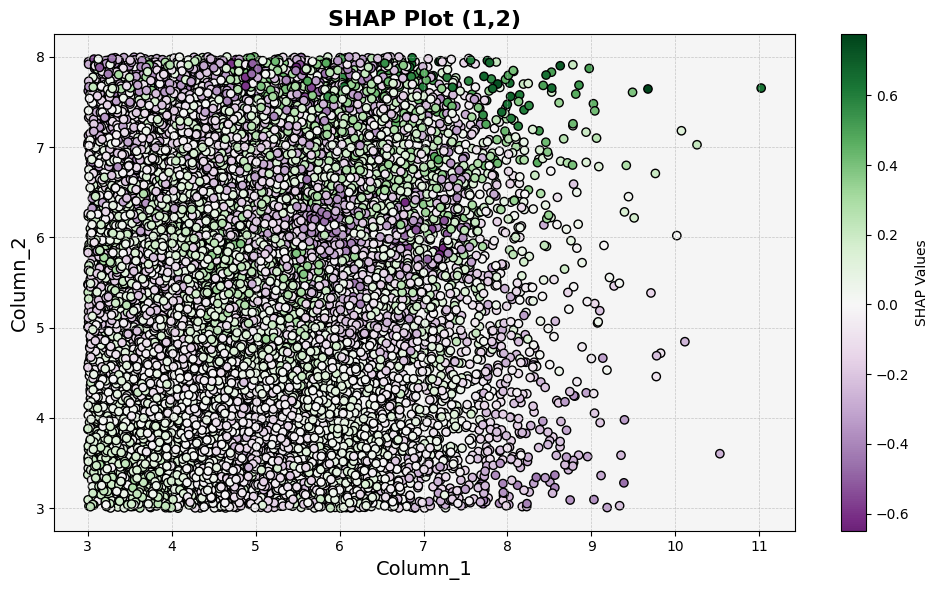

In [8]:
# Interaction Analysis: Feature 2 & Feature 3
df_02 = explainer.analyze_interaction(1, 2)

plot_scatter_chart(
    feature_1,
    feature_2,
    pred,
    x_label="Column_1",
    y_label="Column_2",
    title="Target Plot (1, 2)",
    cbar_label="True Function Values",
)

plot_scatter_chart(
    feature_1,
    feature_2,
    transformed_1 * transformed_2,
    x_label="Column_1",
    y_label="Column_2",
    title="transformed_1* transformed_2",
    cbar_label="True Function Values",
)


plot_scatter_chart(
    feature_1,
    feature_2,
    transformed_1 * transformed_2 - np.mean(transformed_1 * transformed_2 ),
    x_label="Column_1",
    y_label="Column_2",
    title="transformed_1* transformed_2 - E[transformed_1 * transformed_2]",
    cbar_label="True Function Values",
)


interaction_scatter_plot(X, df_02, 1, 2,  figsize = (10,6))

plot_scatter_chart(
    feature_1,
    feature_2,
    shap_interaction_values[:, 1, 2],
    x_label="Column_1",
    y_label="Column_2",
    title="SHAP Plot (1,2)",
    cbar_label="SHAP Values",
)